In [44]:
import matplotlib.pyplot as plt

In [61]:
root = "san_mrc/"
filename = "san.log"

f = open(root+filename, "r")

updates = []
train_loss = []
dev_em = []; dev_f1 = []; dev_acc = []

count = 0

for line in f.readlines():
    line = line.strip().split()
#     print(line)
    # train loss
    if len(line) >= 9 and line[7] == "train" and line[8][:4] == "loss" and line[9][:9] == "remaining":
        updates.append(int(line[6][:-1]))
        loss = float(line[8][5:-1])
        train_loss.append(loss)
#         count += 1
    elif len(line) >= 6 and line[5] == "[Epoch":
        if line[8] == "dev":
            dev_em.append(float(line[10]))
            dev_f1.append(float(line[12]))
        else:
            dev_acc.append(float(line[-1][:-1]))
    
    
train_loss = train_loss[7:]
updates = updates[7:]

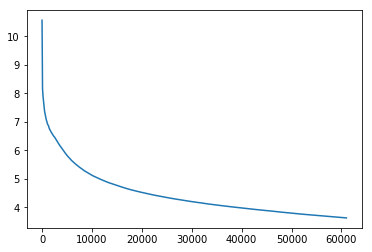

In [62]:
plt.plot(updates, train_loss)
plt.show()

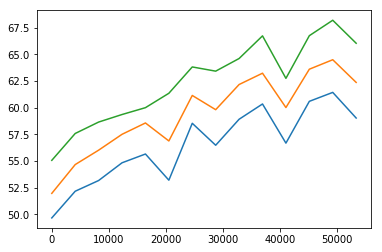

In [63]:
epoch = [i*4100 for i in range(len(dev_acc))]
plt.plot(epoch, dev_em, epoch, dev_f1, epoch, dev_acc)
plt.show()

In [59]:
# plt.plot(epoch, dev_em, epoch, dev_f1, epoch, dev_acc, updates, train_loss)
# plt.show()